<a href="https://colab.research.google.com/github/deryabol/Image_Processing/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Data pre-processing step
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_set=pd.read_csv('/content/Social_Network_Ads.csv')

In [3]:
x=data_set.iloc[:,[2,3]].values
y=data_set.iloc[:,4].values

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25, random_state=0)

In [5]:
from sklearn.preprocessing import StandardScaler
st_x=StandardScaler()
x_train=st_x.fit_transform(x_train)
x_test=st_x.transform(x_test)

In [7]:
#fitting a Decision Tree classifier to the training set
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [8]:
#Predicting the test result
y_pred=classifier.predict(x_test)

In [10]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1])

In [11]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1])

In [12]:
#Test accuracy of the result (creatin of confusion matrix)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [13]:
cm

array([[62,  6],
       [ 3, 29]])

In the above output image, we can see the confusion matrix which has 6+3=9 incorret prediction and 62+29=91 correct predictions. Therefore, we can say that compared to other classification models, the Decision Tree classifier made a good prediction.

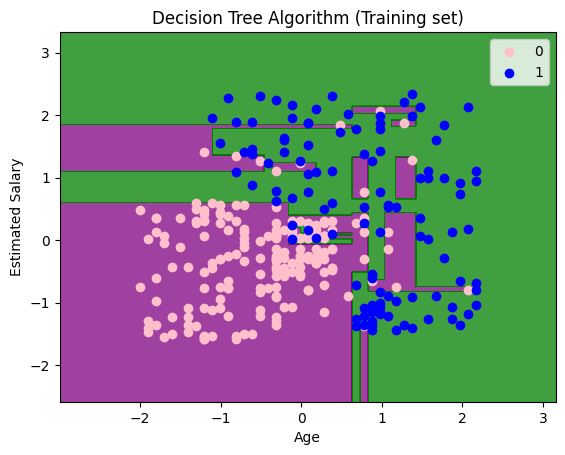

In [44]:
#Visualizing the training set result
from matplotlib.colors import ListedColormap
x_set, y_set=x_train,y_train
X1,X2=np.meshgrid(np.arange(start=x_set[:,0].min() -1, stop=x_set[:,0].max() +1, step=0.01),
      np.arange(start=x_set[:,1].min()-1, stop=x_set[:,1].max()+1, step=0.01))

plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('purple','green')))

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

# Tüm noktaları tek seferde çizin
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set==j,0], x_set[y_set==j, 1],
              color=ListedColormap(('pink','blue'))(i),label=j)

plt.title('Decision Tree Algorithm (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


The above output is completely different from the rest classification models. It has both vertical and horizontal lines that are splitting the dataset according to the age and estimated salary variable.

As we can see, the tree is trying to capture each dataset, which is the case of overfitting.

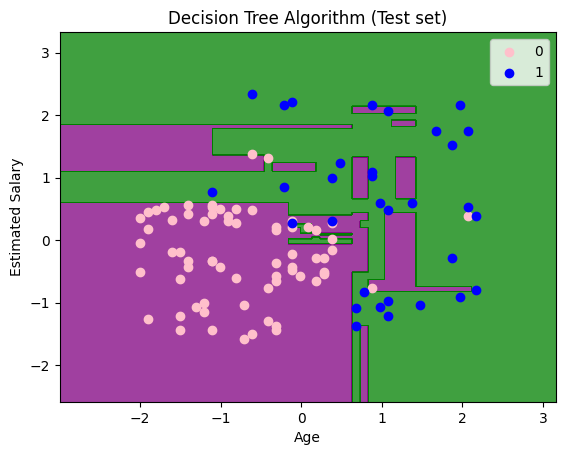

In [43]:
#Visualizing the test set result
from matplotlib.colors import ListedColormap
x_set, y_set=x_test,y_test
X1,X2=np.meshgrid(np.arange(start=x_set[:,0].min() -1, stop=x_set[:,0].max() +1, step=0.01),
      np.arange(start=x_set[:,1].min()-1, stop=x_set[:,1].max()+1, step=0.01))

# Use parentheses to call np.array()
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('purple','green')))

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i, j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set ==j,0], x_set[y_set==j, 1],
              color=ListedColormap(('pink','blue'))(i),label=j)

plt.title('Decision Tree Algorithm (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

As we can see in the above image that there are some blue data points within the purple region and vice versa. So, These ara the incorrect predictions which we have discussed in the confusion matrix.